<a href="https://colab.research.google.com/github/rvp3011/Lab0/blob/main/Practice_Activity_Multiple_Linear_Regression_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
!pip install palmerpenguins

In [15]:
import pandas as pd
from palmerpenguins import load_penguins

penguins_df = load_penguins()

cols = [
    'bill_depth_mm', 'bill_length_mm', 'flipper_length_mm',
    'body_mass_g', 'year', 'species', 'island', 'sex'
]
df = penguins_df[cols].dropna()

df = pd.get_dummies(df, columns=['species', 'island', 'sex'], drop_first=True)

y = df['bill_depth_mm']
X1 = df.drop(columns='bill_depth_mm')


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

,Train RMSE,Test RMSE
Model 1 (All Predictors),0.727395,0.946497
Model 2 (Numerical Predictors),1.512162,1.686094
Model 3 (Species and Island),1.072757,1.289286
"Model 4 (Bill, Flipper, Body Mass)",1.521147,1.682156


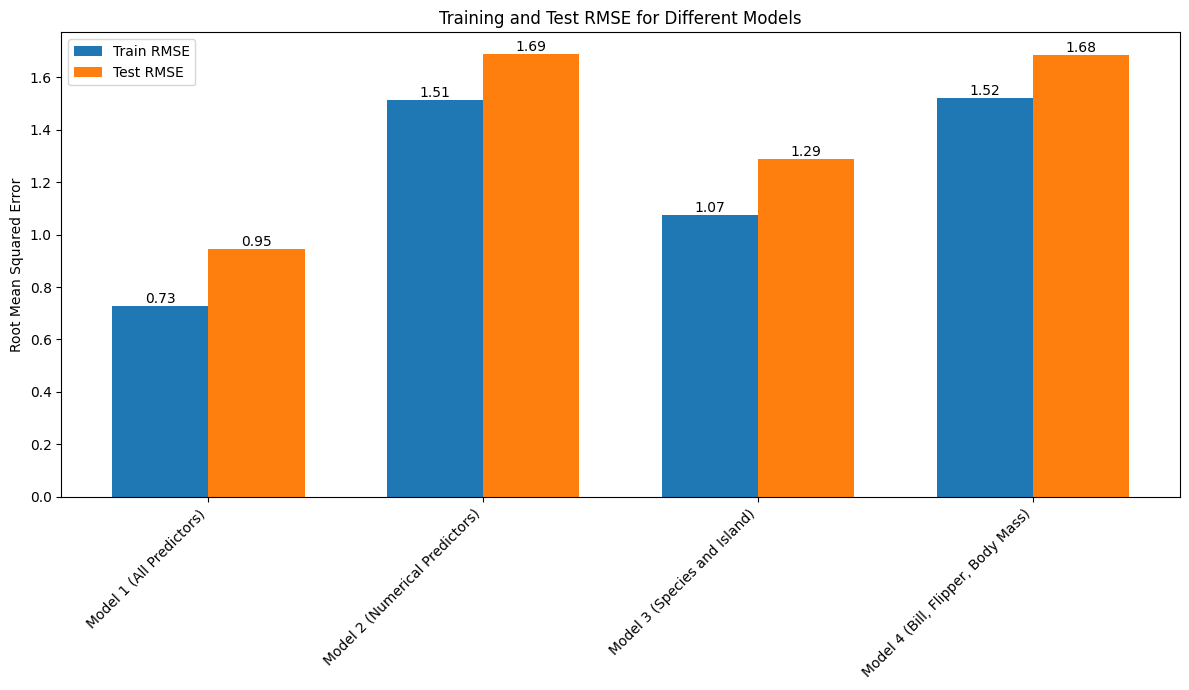

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

target = 'bill_depth_mm'

X = penguins_df_cleaned.drop(target, axis=1)
y = penguins_df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_specs = {
    "Model 1 (All Predictors)": X_train.columns.tolist(),
    "Model 2 (Numerical Predictors)": ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'year'],
    "Model 3 (Species and Island)": [col for col in X_train.columns if 'species' in col or 'island' in col],
    "Model 4 (Bill, Flipper, Body Mass)": ['bill_length_mm', 'flipper_length_mm', 'body_mass_g']
}

results = {}

for name, predictors in model_specs.items():
    model = LinearRegression()
    model.fit(X_train[predictors], y_train)
    y_train_pred, y_test_pred = model.predict(X_train[predictors]), model.predict(X_test[predictors])

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    results[name] = {'Train RMSE': train_rmse, 'Test RMSE': test_rmse}

results_df = pd.DataFrame(results).T
display(results_df)

fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.35
models_names = list(results.keys())
x = np.arange(len(models_names))

ax.bar(x - bar_width/2, [results[name]['Train RMSE'] for name in models_names], bar_width, label='Train RMSE')
ax.bar(x + bar_width/2, [results[name]['Test RMSE'] for name in models_names], bar_width, label='Test RMSE')

ax.set_ylabel('Root Mean Squared Error')
ax.set_title('Training and Test RMSE for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models_names, rotation=45, ha="right")
ax.legend()

for i in range(len(models_names)):
    ax.text(x[i] - bar_width/2, results[models_names[i]]['Train RMSE'], f'{results[models_names[i]]["Train RMSE"]:.2f}', ha='center', va='bottom')
    ax.text(x[i] + bar_width/2, results[models_names[i]]['Test RMSE'], f'{results[models_names[i]]["Test RMSE"]:.2f}', ha='center', va='bottom')

fig.tight_layout()
plt.show()